In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [43]:
dataparse= lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
adani=pd.read_csv('adani2.csv', parse_dates=['Date'],date_parser=dataparse)
adani

C:\Users\Nachiketh\AppData\Local\Temp\ipykernel_8052\1197383673.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2016-01-01,ADANIENT,EQ,83.40,83.60,90.70,82.35,90.45,90.10,87.35,5974246,5.218478e+13,23931,997632,0.1670
1,2016-01-04,ADANIENT,EQ,90.10,89.50,92.05,84.25,85.00,85.10,87.98,5126957,4.510840e+13,21819,970860,0.1894
2,2016-01-05,ADANIENT,EQ,85.10,85.65,89.60,84.20,88.10,88.60,87.19,5341021,4.656601e+13,19808,698935,0.1309
3,2016-01-06,ADANIENT,EQ,88.60,88.00,88.95,85.30,86.20,86.25,86.99,3865229,3.362317e+13,15971,430640,0.1114
4,2016-01-07,ADANIENT,EQ,86.25,84.90,84.90,78.00,79.80,79.95,81.59,4859987,3.965048e+13,18395,1069125,0.2200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
981,2019-12-24,ADANIENT,EQ,214.55,214.55,216.95,207.60,208.85,209.15,212.21,2984621,6.333605e+13,18225,643046,0.2155
982,2019-12-26,ADANIENT,EQ,209.15,208.95,211.10,205.60,210.45,208.95,208.15,3299177,6.867185e+13,19516,478566,0.1451
983,2019-12-27,ADANIENT,EQ,208.95,209.05,211.20,207.10,210.00,209.10,209.33,2240503,4.690156e+13,12271,436129,0.1947
984,2019-12-30,ADANIENT,EQ,209.10,209.90,211.60,208.00,208.35,208.65,209.53,1938731,4.062276e+13,13068,264896,0.1366


In [44]:
adani.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2016-01-01,ADANIENT,EQ,83.40,83.60,90.70,82.35,90.45,90.10,87.35,5974246,5.218478e+13,23931,997632,0.1670
1,2016-01-04,ADANIENT,EQ,90.10,89.50,92.05,84.25,85.00,85.10,87.98,5126957,4.510840e+13,21819,970860,0.1894
2,2016-01-05,ADANIENT,EQ,85.10,85.65,89.60,84.20,88.10,88.60,87.19,5341021,4.656601e+13,19808,698935,0.1309
3,2016-01-06,ADANIENT,EQ,88.60,88.00,88.95,85.30,86.20,86.25,86.99,3865229,3.362317e+13,15971,430640,0.1114
4,2016-01-07,ADANIENT,EQ,86.25,84.90,84.90,78.00,79.80,79.95,81.59,4859987,3.965048e+13,18395,1069125,0.2200


In [45]:
print(f'Dataframe contains stock price between {adani.Date.min()} {adani.Date.max()}')
print(f'Total days={(adani.Date.max()  - adani.Date.min()).days}days')

Dataframe contains stock price between 2016-01-01 00:00:00 2019-12-31 00:00:00
Total days=1460days


In [46]:
adani.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,9.860000e+02,9.860000e+02,986.000000,9.860000e+02,986.000000
mean,127.229462,127.239249,130.211511,124.282454,127.170233,127.356187,127.373631,6.443150e+06,9.087652e+13,30661.483773,1.025712e+06,0.176435
std,42.087771,41.878540,43.040943,40.898278,42.004456,42.143740,42.018384,7.689017e+06,1.278625e+14,34174.666705,1.240135e+06,0.089355
min,58.750000,59.000000,61.300000,58.200000,58.850000,58.750000,59.580000,2.881250e+05,1.932774e+12,1623.000000,1.172650e+05,0.035900
25%,83.325000,83.600000,85.062500,82.025000,83.437500,83.387500,83.395000,2.783314e+06,3.045689e+13,13336.250000,4.529320e+05,0.113750
50%,130.950000,131.000000,133.950000,128.075000,130.875000,131.000000,131.360000,4.297674e+06,5.562926e+13,21193.000000,6.527295e+05,0.157150
75%,152.437500,152.075000,155.637500,148.425000,151.725000,152.450000,152.142500,7.039624e+06,9.915842e+13,34293.000000,1.090232e+06,0.216525
max,229.700000,231.700000,236.650000,222.350000,228.850000,229.700000,229.320000,9.271507e+07,1.393104e+15,376202.000000,1.627167e+07,0.680600


<AxesSubplot:>

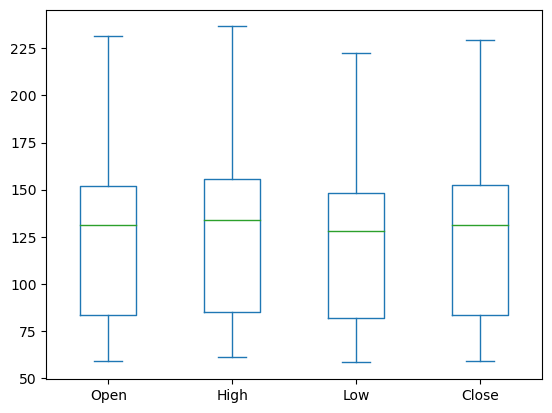

In [47]:
adani[['Open','High','Low','Close']].plot(kind='box')

In [48]:
layout=go.Layout(
    title='Stock Price Of Adani Enterprise',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family="Courier New, monospace",
            size=12,
            color='#7f7f7f'
        )
    )
)

adani_data=[{'x':adani['Date'],'y':adani['Close']}]
plot=go.Figure(data=adani_data, layout=layout)

In [49]:
iplot(plot)

In [50]:
#Building the regression model
from sklearn.model_selection import train_test_split
#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#for model evolution
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [51]:
#split the data into train and test sets
X=np.array(adani.index).reshape(-1,1)
Y=adani['Close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [52]:
#feature scaling
scaler=StandardScaler().fit(X_train)

In [53]:
from sklearn.linear_model import LinearRegression

In [54]:
#Creating a linear model
lm=LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression()

In [55]:
trace0 = go.Scatter(
    x = X_train.T[0],
    y = Y_train,
    mode = "markers",
    name = "Actual"
)
trace1 = go.Scatter(
    x = X_train.T[0],
    y = lm.predict(X_train).T,
    mode = 'lines',
    name = 'Predicted'
)
adani_data = [trace0,trace1]
layout.xaxis.title.text = "Day"
plot2 = go.Figure(data=adani_data, layout=layout)

In [56]:
iplot(plot2)

In [57]:
#calculate scores for model evaluation
scores=f'''
{'Metric'.ljust(10)}{'Train'.center(20)}{'Test'.center(20)}
{'r2_score'.ljust(10)}{r2_score(Y_train, lm.predict(X_train))}\t{r2_score(Y_test, lm.predict(X_test))}
{'MSE'.ljust(10)}{mse(Y_train, lm.predict(X_train))}\t{mse(Y_test, lm.predict(X_test))}

'''
print(scores)


Metric           Train                Test        
r2_score  0.581017568992845	0.5834241764033234
MSE       746.7627547379557	731.0611322002869


